In [6]:
import pandas as pd
import numpy as np
import datetime
import time
import requests
from bs4 import BeautifulSoup
import os
from selenium.webdriver.common.keys import Keys 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import pyperclip


In [7]:
from overview_trial import df_overview
df_overview

,Company,Sector,Industry,Country
Ticker,,,,
A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA
AA,Alcoa Corporation,Basic Materials,Aluminum,USA
AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China
AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA
AAIC,Arlington Asset Investment Corp.,Real Estate,REIT - Mortgage,USA
...,...,...,...,...
ZVO,Zovio Inc,Consumer Defensive,Education & Training Services,USA
ZWRKU,Z-Work Acquisition Corp.,Financial,Shell Companies,USA
ZYME,Zymeworks Inc.,Healthcare,Biotechnology,Canada


In [8]:
from IBD import df_ibd
df_ibd

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,Vol. % Change,Vol. (1000s)
HWM,31.84,-0.29,-0.90,66.0,38.0,83.0,13.0,2.0,6.0,3.0,-26.0,2730
ABM,50.87,-0.14,-0.27,80.0,86.0,73.0,5.0,3.0,10.0,3.0,-3.0,372
ABT,118.87,-0.97,-0.81,67.0,91.0,42.0,1.0,5.0,4.0,3.0,-35.0,3427
ACU,40.00,0.56,1.42,94.0,85.0,79.0,8.0,4.0,8.0,1.0,-23.0,10
ADI,160.38,5.30,3.42,93.0,87.0,58.0,10.0,5.0,10.0,4.0,1.0,3266
...,...,...,...,...,...,...,...,...,...,...,...,...
IACB,0.00,0.00,0.00,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,0
BOAS,0.00,0.00,0.00,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,0
SCOB,0.00,0.00,0.00,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,0
TSIB,0.00,0.00,0.00,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,0


In [9]:
from scraping import df_tt
df_tt

,Beta,ATR,SMA20,SMA50,SMA200,52W High,52W Low,RSI,Price,from Open,Gap
Ticker,,,,,,,,,,,
A,1.01,2.79,0.0481,0.0359,0.1731,-0.0678,0.8739,62.16,127.69,-0.0024,0.0068
AB,1.41,1.04,0.0378,0.0745,0.2806,-0.0463,1.4559,60.17,40.94,0.0209,0.0028
ABBV,0.81,2.21,0.0199,0.0185,0.0982,-0.0431,0.5192,56.53,108.52,-0.0037,0.0065
ABC,0.52,2.71,0.0298,0.0735,0.1422,-0.0303,0.4611,61.36,116.89,-0.0089,-0.0011
ABR,1.93,0.59,-0.0016,0.0284,0.2680,-0.0599,3.2751,51.69,16.16,0.0094,0.0069
...,...,...,...,...,...,...,...,...,...,...,...
XPO,2.18,4.74,0.0501,0.0664,0.2621,-0.0300,1.9092,58.62,127.48,0.0341,-0.0002
Y,0.65,13.86,-0.0030,0.0281,0.1157,-0.0408,0.4648,51.71,636.51,0.0241,-0.0076
YETI,NaN,3.47,0.0426,0.0429,0.2704,-0.0879,3.4960,54.83,73.78,0.0055,0.0162


In [10]:
df_rs = df_ibd[df_ibd['RS Rating'] > 70]
df_rs

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,Vol. % Change,Vol. (1000s)
HWM,31.84,-0.29,-0.90,66.0,38.0,83.0,13.0,2.0,6.0,3.0,-26.0,2730
ABM,50.87,-0.14,-0.27,80.0,86.0,73.0,5.0,3.0,10.0,3.0,-3.0,372
ACU,40.00,0.56,1.42,94.0,85.0,79.0,8.0,4.0,8.0,1.0,-23.0,10
NBR,98.47,5.02,5.37,56.0,7.0,97.0,13.0,1.0,10.0,3.0,-46.0,123
SWKS,187.70,4.22,2.30,95.0,84.0,71.0,10.0,5.0,9.0,4.0,4.0,2717
...,...,...,...,...,...,...,...,...,...,...,...,...
BCAB,51.09,0.25,0.49,34.0,15.0,77.0,7.0,1.0,11.0,5.0,-56.0,130
ZIM,26.47,2.13,8.75,99.0,74.0,96.0,13.0,5.0,11.0,NaN,-41.0,552
TIRX,90.39,3.64,4.20,51.0,9.0,99.0,2.0,2.0,13.0,NaN,-93.0,8
AMPG,11.73,0.78,7.12,71.0,38.0,86.0,10.0,3.0,NaN,NaN,-20.0,844


In [11]:
trend_template_list = list(set(df_rs.index.tolist()) & set(df_tt.index.tolist()))
len(trend_template_list)

386

In [12]:
df_overview_groupby_sector = pd.DataFrame(df_overview.groupby('Sector').count()['Company'])
df_overview_groupby_sector

,Company
Sector,
Basic Materials,246
Communication Services,266
Consumer Cyclical,497
Consumer Defensive,218
Energy,291
Financial,1298
Healthcare,1101
Industrials,587
Real Estate,276


In [13]:
filtered = df_overview[df_overview.index.isin(trend_template_list)]
filtered_groupby_sector = pd.DataFrame(filtered.groupby('Sector').count()['Company'])
filtered_groupby_sector

,Company
Sector,
Basic Materials,30
Communication Services,11
Consumer Cyclical,62
Consumer Defensive,16
Energy,6
Financial,79
Healthcare,49
Industrials,63
Real Estate,6


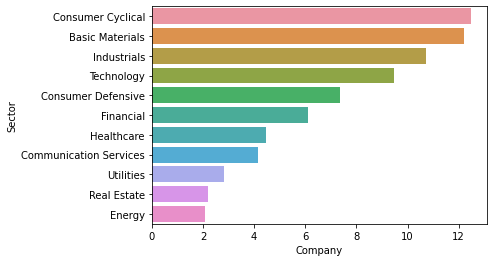

In [14]:
df_proportion = (filtered_groupby_sector/df_overview_groupby_sector*100).sort_values(by='Company', ascending=False)
sns.barplot(y=df_proportion.index, x=df_proportion['Company']);

In [16]:
df_proportion.T

Sector,Consumer Cyclical,Basic Materials,Industrials,Technology,Consumer Defensive,Financial,Healthcare,Communication Services,Utilities,Real Estate,Energy
Company,12.474849,12.195122,10.732538,9.457364,7.33945,6.086287,4.4505,4.135338,2.830189,2.173913,2.061856


In [1]:
from trend_template import return_TT
return_TT()

assets/Finviz/20210307_total.csv
assets/IBD_Excel/20210404_IBD.xlsx
./assets/Trend_Template/20210404_Full_TT.csv
./assets/Trend_Template/20210404_Full_TT.csv


,Unnamed: 0,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,...,52W High,52W Low,RSI,Price.1,from Open,Gap,Company,Sector,Industry,Country
0,SWKS,187.70,4.22,2.30,95.0,84.0,71.0,10.0,5.0,9.0,...,-0.0415,1.3607,58.35,187.70,0.0091,0.0137,"Skyworks Solutions, Inc.",Technology,Semiconductors,USA
1,ARW,112.18,1.36,1.23,82.0,79.0,73.0,8.0,3.0,6.0,...,-0.0034,1.2895,62.82,112.14,0.0047,0.0072,"Arrow Electronics, Inc.",Technology,Electronics & Computer Distribution,USA
2,AVY,187.99,4.34,2.36,91.0,91.0,72.0,8.0,4.0,11.0,...,0.0070,1.0160,63.11,188.07,0.0245,-0.0004,Avery Dennison Corporation,Industrials,Business Equipment & Supplies,USA
3,BC,96.76,1.39,1.46,95.0,91.0,84.0,7.0,5.0,10.0,...,-0.1014,2.7841,51.90,96.91,0.0034,0.0127,Brunswick Corporation,Consumer Cyclical,Leisure,USA
4,CLF,19.41,-0.70,-3.48,90.0,20.0,96.0,12.0,4.0,10.0,...,-0.0452,4.8848,63.96,19.42,-0.0367,0.0025,Cleveland-Cliffs Inc.,Basic Materials,Steel,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,AOUT,26.07,0.87,3.45,90.0,78.0,78.0,7.0,3.0,12.0,...,-0.1313,1.1303,63.50,26.07,0.0499,-0.0147,"American Outdoor Brands, Inc.",Consumer Cyclical,Leisure,USA
382,PLBY,23.38,3.79,19.30,86.0,56.0,92.0,8.0,3.0,11.0,...,0.0935,1.3736,73.86,23.38,0.2133,-0.0163,"PLBY Group, Inc.",Consumer Cyclical,Leisure,USA
383,ASO,29.04,2.05,7.60,97.0,99.0,87.0,8.0,5.0,11.0,...,0.0371,1.4100,67.68,29.04,0.0724,0.0033,"Academy Sports and Outdoors, Inc.",Consumer Cyclical,Specialty Retail,USA
384,PUBM,58.00,8.68,17.60,94.0,80.0,89.0,5.0,5.0,12.0,...,-0.2463,1.5870,58.78,58.00,0.1375,0.0339,"PubMatic, Inc.",Technology,Software - Application,USA


In [57]:
def return_proportion():
    """
    Return filename of today
    :return: string
    """
    filename = './assets/' + 'Proportion_overtime' + '.csv'
    print(filename)
    return pd.read_csv(filename, index_col=0)

original = return_proportion()



./assets/Proportion_overtime.csv


In [58]:
original

,Consumer Cyclical,Basic Materials,Industrials,Technology,Consumer Defensive,Financial,Healthcare,Communication Services,Utilities,Real Estate,Energy
2021-04-03,12.474849,12.195122,10.732538,9.457364,7.33945,6.086287,4.4505,4.135338,2.830189,2.173913,2.061856


In [59]:
df_proportion

,Company
Date,
Consumer Cyclical,12.474849
Basic Materials,12.195122
Industrials,10.732538
Technology,9.457364
Consumer Defensive,7.339450
Financial,6.086287
Healthcare,4.450500
Communication Services,4.135338
Utilities,2.830189


In [61]:
def save_proportion(original, proportion):

    today_date = datetime.datetime.now().strftime("%Y-%m-%d")
    if original.index[-1] != today_date:

        df = proportion.T
        df.index = [datetime.datetime.today().date()]
        df.columns.name = 'Date'
        
        return pd.concat([original, df], axis=0)
    
new = save_proportion(original, df_proportion)
new

Date,Consumer Cyclical,Basic Materials,Industrials,Technology,Consumer Defensive,Financial,Healthcare,Communication Services,Utilities,Real Estate,Energy
2021-04-03,12.474849,12.195122,10.732538,9.457364,7.33945,6.086287,4.4505,4.135338,2.830189,2.173913,2.061856
2021-04-04,12.474849,12.195122,10.732538,9.457364,7.33945,6.086287,4.4505,4.135338,2.830189,2.173913,2.061856


Date,Energy,Real Estate,Utilities,Communication Services,Healthcare,Financial,Consumer Defensive,Technology,Industrials,Basic Materials,Consumer Cyclical
2021-04-04,2.061856,2.173913,2.830189,4.135338,4.4505,6.086287,7.33945,9.457364,10.732538,12.195122,12.474849


In [41]:
df_proportion

,Company
Date,
Consumer Cyclical,12.474849
Basic Materials,12.195122
Industrials,10.732538
Technology,9.457364
Consumer Defensive,7.339450
Financial,6.086287
Healthcare,4.450500
Communication Services,4.135338
Utilities,2.830189


In [54]:
combined = pd.concat([original,df], axis=0)
combined

,Consumer Cyclical,Basic Materials,Industrials,Technology,Consumer Defensive,Financial,Healthcare,Communication Services,Utilities,Real Estate,Energy
2021-04-03,12.474849,12.195122,10.732538,9.457364,7.33945,6.086287,4.4505,4.135338,2.830189,2.173913,2.061856
2021-04-04,12.474849,12.195122,10.732538,9.457364,7.33945,6.086287,4.4505,4.135338,2.830189,2.173913,2.061856


In [46]:
df = df_proportion.sort_values(by='Company', ascending=True).T
df.index = [datetime.datetime.today().date()]
df.columns.name = 'Date'
df

Date,Energy,Real Estate,Utilities,Communication Services,Healthcare,Financial,Consumer Defensive,Technology,Industrials,Basic Materials,Consumer Cyclical
2021-04-04,2.061856,2.173913,2.830189,4.135338,4.4505,6.086287,7.33945,9.457364,10.732538,12.195122,12.474849


In [30]:
original.index[-1]

'2021-04-03'

In [35]:
datetime.datetime.now().strftime("%Y-%m-%d")




'2021-04-04'

In [20]:
import datetime
df2 = df_proportion.T
df2.index = [datetime.datetime.today().date()]
df2.columns.name = 'Date'
df2.to_csv(return_proportion_filename())

./assets/Proportion_overtime.csv


In [115]:
df2.index.tolist()[-1] == df2.index.tolist()[-1]

True

In [74]:
df_conclusion = pd.concat([df_ibd, df_tt, filtered], join='inner', axis=1, )
df_conclusion

,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,...,52W High,52W Low,RSI,Price,from Open,Gap,Company,Sector,Industry,Country
BC,105.72,2.13,2.06,96.0,91.0,83.0,9.0,5.0,10.0,3.0,...,-0.0784,2.9409,56.33,99.39,-0.0095,0.0039,Brunswick Corporation,Consumer Cyclical,Leisure,USA
UIS,27.26,0.00,0.00,67.0,72.0,91.0,6.0,NaN,8.0,3.0,...,-0.0727,1.7679,51.37,25.88,-0.0513,-0.0018,Unisys Corporation,Technology,Information Technology Services,USA
CLF,17.05,-0.49,-2.81,77.0,19.0,93.0,13.0,4.0,2.0,3.0,...,-0.1140,5.3232,54.14,16.63,-0.0131,0.0096,Cleveland-Cliffs Inc.,Basic Materials,Steel,USA
DAN,26.31,-0.55,-2.05,70.0,19.0,88.0,12.0,2.0,10.0,3.0,...,-0.0790,4.9390,55.22,25.30,-0.0113,0.0000,Dana Incorporated,Consumer Cyclical,Auto Parts,USA
DE,371.46,1.97,0.53,97.0,93.0,87.0,10.0,4.0,9.0,3.0,...,-0.0508,2.5057,66.83,372.48,-0.0133,-0.0076,Deere & Company,Industrials,Farm & Heavy Construction Machinery,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEG,49.02,4.32,9.66,52.0,22.0,83.0,7.0,2.0,8.0,4.0,...,-0.0894,1.8641,56.27,47.00,-0.0325,0.0180,"Montrose Environmental Group, Inc.",Industrials,Waste Management,USA
FTHM,40.10,1.77,4.62,62.0,43.0,95.0,8.0,2.0,9.0,NaN,...,-0.2258,4.1050,55.97,43.98,0.0651,-0.0051,Fathom Holdings Inc.,Real Estate,Real Estate Services,USA
ASO,25.32,-0.38,-1.49,97.0,99.0,83.0,7.0,4.0,8.0,4.0,...,-0.0836,1.1295,55.40,25.66,0.0297,-0.0068,"Academy Sports and Outdoors, Inc.",Consumer Cyclical,Specialty Retail,USA
NGMS,37.73,2.37,6.70,93.0,69.0,80.0,5.0,5.0,11.0,5.0,...,-0.0382,1.1837,78.38,40.77,-0.0225,0.0188,NeoGames S.A.,Communication Services,Electronic Gaming & Multimedia,Israel


In [ ]:
trend_template_str = ','.join(trend_template_list)

In [ ]:
trend_template_str = 'A,AAPL,AA'

In [ ]:

def finviz_link_charts():
    
    finviz_chart_url = 'https://finviz.com/screener.ashx?v=211&t='
    trend_template_list = pd.merge(df_rs, df_tt, left_index=True, right_index=True).index.tolist()
    
    trend_template_str = ','.join(trend_template_list)
    
    result = finviz_chart_url + trend_template_str
    
    return result
finviz_link_charts()

In [ ]:
from overview_trial import df_overview
df_overview
#del df_overview['Price']
df_overview

In [ ]:
pd.read_csv('./Finviz/20210221_total.csv', index_col = 0)

In [ ]:
url = 'https://finviz.com/screener.ashx'
driver = webdriver.Chrome('./chromedriver')
ticker_input_x = '//*[@id="tickersInput"]'
enter_button_x = '/html/body/table[3]/tbody/tr[1]/td/table/tbody/tr[2]/td[10]/input'
charts_button_x = '//*[@id="screener-content"]/table/tbody/tr[1]/td/table/tbody/tr/td[8]/a'
driver.get(url)